**LOGISTIC REGRESSION**

It is used for classification problems, problems with binary answers like, If you want to classify an email as either as spam or not spam, If you want to classify a cancer tumor as benign or malignant.

In this dataset we are classifying the gender of the voice as male or female.

1. Hypothesis function- The hypothesis function gives us the probability that the output is 1. Here, the hypothesis function is a function of the sigmoid function. Also, the hypothesis equation lies between 0 and 1. Based on the value produced by the hypothesis function we can decide to which class an output belongs to. Sigmoid function is taken as the hypothesis function.

We set a decision boundary to classify the outputs that we get. The decision boundary is the line that separates the area where y = 0 and where y = 1. It gets created by our hypothesis function. Here, the decision boundary is taken as 0.5.
![alt text](https://miro.medium.com/max/801/1*2g14OVjyJqio2zXwJxgj2w.png)
2. Error/ Cost function- We use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.
Since the output states can vary depending on the value of y, we combine the two separate cost function. The combined cost function used here is

![alt text](https://miro.medium.com/max/274/1*N6THdTd451D4C2RAhhqRCQ.png)

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Defining the functions

In [0]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

In [0]:
def error(a,b,c,x1,x2,y):
  error = 0
  m = len(y)
  for i in range(m):
    f = a*x1[i] + b*x2[i] + c
    error += (-y[i] * np.log(sigmoid(f))) - ((1-y[i]) * np.log(1-sigmoid(f)))

  return error/m

In [0]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0

  m = len(y)

  for i in range(m):
    f = a*x1[i] + b*x2[i] + c

    grad_a += (sigmoid(f) - y[i]) * x1[i]
    grad_b += (sigmoid(f) - y[i]) * x2[i]
    grad_c += (sigmoid(f) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)

  return a,b,c

In [0]:
def descend(init_a,init_b,init_c,x1,x2,y,learning_rate,iterations):
  a, b, c = init_a, init_b,init_c

  for i in range(iterations):
    e = error(a,b,c,x1,x2,y)
    if i % 1000 == 0:
      print("Error: %4f a, b, c =%4f, %4f, %4f " %(e, a, b, c))
    
    a,b,c = step_gradient(a, b,c, x1,x2, y, learning_rate)
  return a,b,c

In [0]:
def accuracy(a,b,c,x1,x2,y):
  correct = 0
  for i in range(len(y)):
    f = (a*x1[i]) + (b*x2[i]) + c
    prediction = sigmoid(f)
    if prediction > 0.4:
      z = 1
    else:
      z = 0
    if y[i]==z:
      correct+=1

  print("Accuracy: {}".format(correct/len(y)))

Loading the Data 

In [0]:
voice = pd.read_csv("/content/drive/My Drive/dataset/voice.csv")

In [0]:
voice['label']  = voice['label'].astype('category').cat.codes

In [190]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Finding correlation using heatmap and pearson correlation.

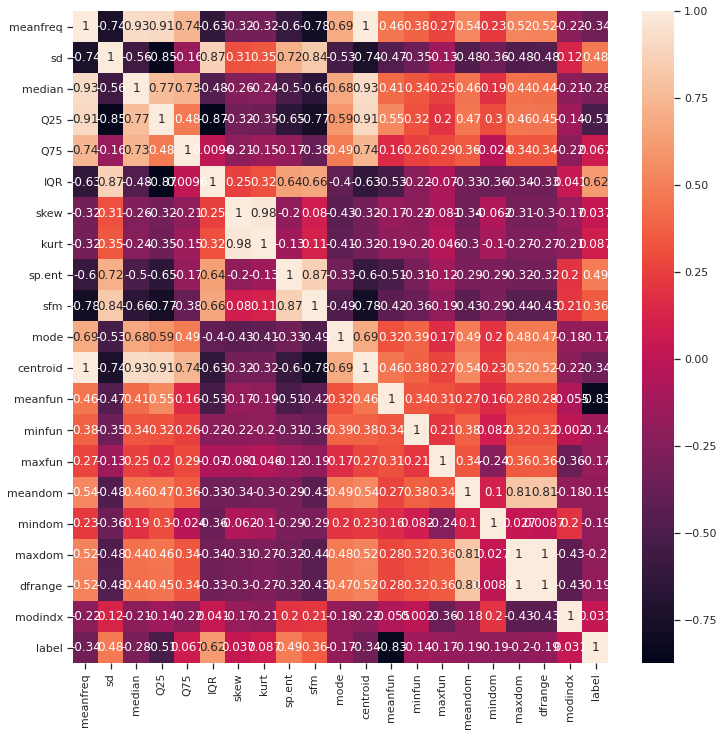

In [191]:
plt.figure(figsize = (12,12))
sns.heatmap(voice.corr(), annot=True)

In [172]:
corr_voice = voice.corr('pearson')
corr_voice['label'].sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

In [0]:
features = voice.iloc[:, :-1]
target = voice.iloc[:,-1]

Normalizing the features

In [0]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Based on the correlation, meanfun and Q25 seem to be best correlated to the target

In [0]:
x1 = voice['meanfun'].values
x2 = voice['Q25'].values
y = voice['label'].values

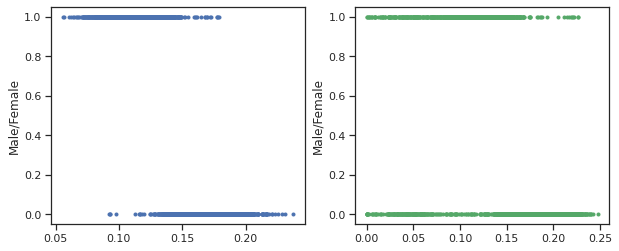

In [195]:
fig= plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x1,y,'b.')
plt.ylabel('Male/Female')
plt.subplot(1,2,2)
plt.plot(x2,y,'g.')
plt.ylabel('Male/Female')
plt.show()

In [0]:

x1_train, x1_test,x2_train, x2_test, y_train, y_test = train_test_split(x1,x2,y,test_size=0.2)

In [0]:
a, b, c = 0, 0, 0
learning_rate = 0.008
iterations = 10000

In [201]:
final_a, final_b , final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)


Error: 0.693147 a, b, c =0.000000, 0.000000, 0.000000 
Error: 0.185161 a, b, c =-84.432565, -20.396774, 14.884690 
Error: 0.164678 a, b, c =-104.193438, -18.131050, 17.376441 
Error: 0.156442 a, b, c =-116.914984, -18.292145, 19.198800 
Error: 0.152117 a, b, c =-126.144804, -18.593666, 20.544432 
Error: 0.149554 a, b, c =-133.254664, -18.867672, 21.585678 
Error: 0.147920 a, b, c =-138.935231, -19.102395, 22.419168 
Error: 0.146824 a, b, c =-143.586920, -19.302788, 23.102448 
Error: 0.146063 a, b, c =-147.463961, -19.474783, 23.672387 
Error: 0.145521 a, b, c =-150.738438, -19.623324, 24.154039 


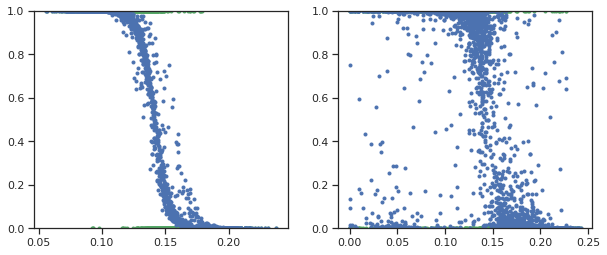

In [199]:
fig= plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
f = (final_a * x1_train) + (final_b * x2_train) + final_c
plt.plot(x1_train, y_train, 'g.',    # The data points
         x1_train, sigmoid(f), 'b.') 
plt.ylim(0,1)
plt.subplot(1,2,2)
f = (final_a * x1_train) + (final_b * x2_train) + final_c
plt.plot(x2_train, y_train, 'g.',    # The data points
         x2_train, sigmoid(f), 'b.') 
plt.ylim(0,1)
plt.show()

In [204]:
accuracy(final_a,final_b,final_c,x1_train,x2_train,y_train)


Accuracy: 0.9530386740331491


In [205]:
accuracy(final_a,final_b,final_c,x1_test,x2_test,y_test)

Accuracy: 0.9574132492113565



After training with two features, the accuracies are as follows:

Accuracy of train_data : 95.30%
Accuracy of test_data : 95.74%
